In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
from tqdm import tqdm
from collections import defaultdict

## Зашумленный бандит

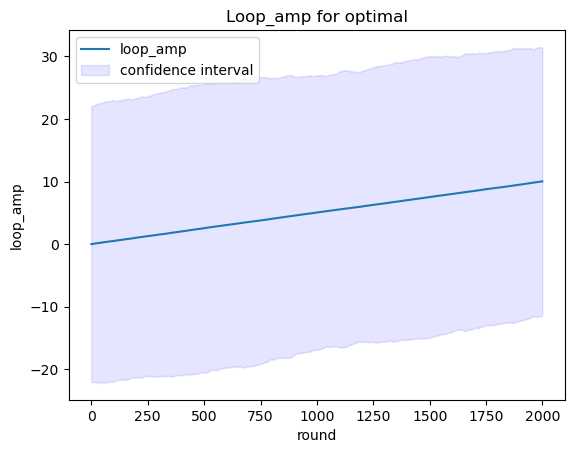

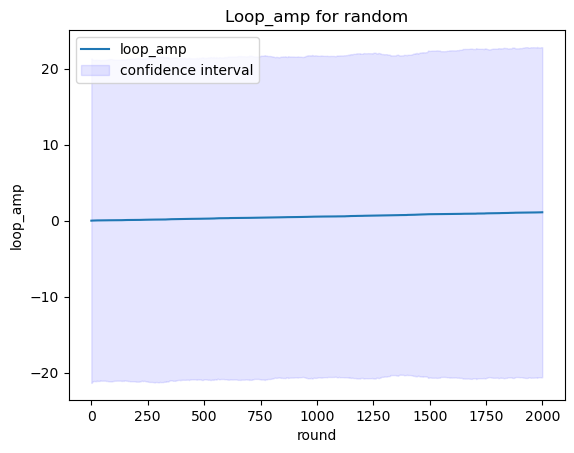

In [2]:
for algorithm in ('e_greedy', 'optimal', 'random', 'thompson_sampling'):
    data_path = f"../../results/closed-loop-feedback-experiment/49/additive_noise/{algorithm}_metrics.parquet"
    df = pd.read_parquet(data_path)
    
    min_scale_factor = df.loop_amp.min()
    
    loop_amp = df.loop_amp.values - min_scale_factor
    conf_down = df.loop_amp_confidence_interval.apply(lambda x: x[0]).values - min_scale_factor
    conf_up = df.loop_amp_confidence_interval.apply(lambda x: x[1]).values - min_scale_factor
    x = list(range(len(loop_amp)))
    
    plt.figure()
    plt.title(f'Loop_amp for {algorithm}')
    plt.plot(x, loop_amp, label='loop_amp')
    plt.fill_between(x, conf_down, conf_up, color='b', alpha=.1, label='confidence interval')
    plt.xlabel('round')
    plt.ylabel('loop_amp')
    plt.legend(loc='upper left')

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 120.60it/s]


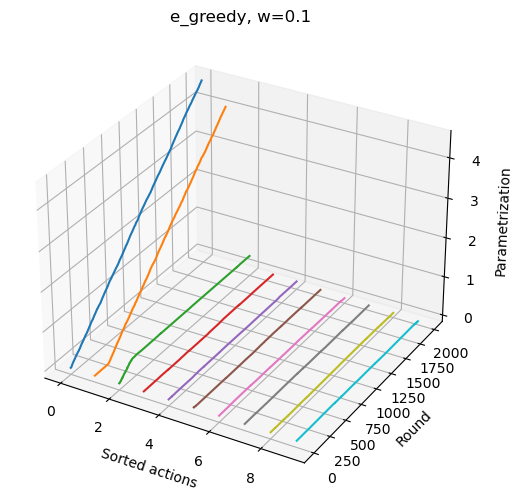

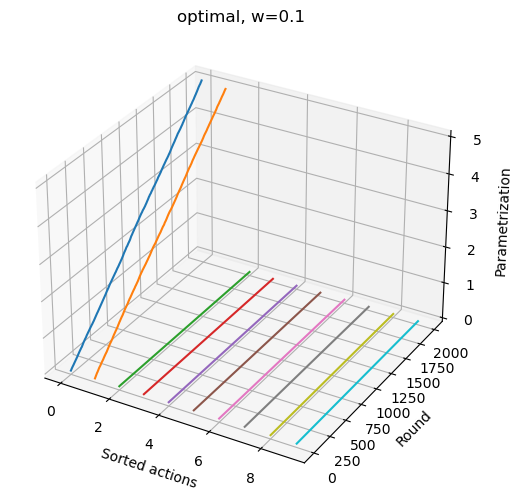

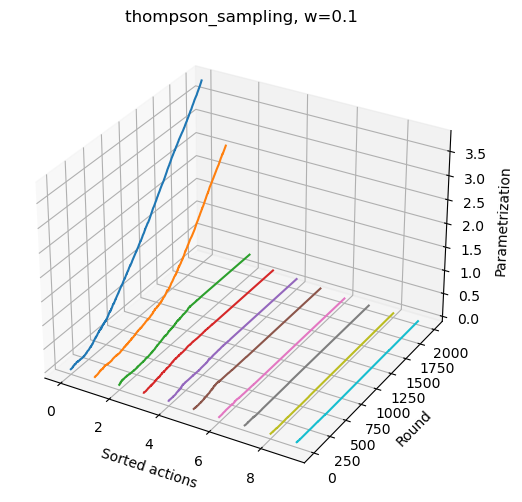

In [3]:
data_path = "../../results/closed-loop-feedback-experiment/49/additive_noise/trial-num:*/data-*.parquet"
filenames = glob.glob(data_path)

dfs = []
for filename in tqdm(filenames):
    dfs.append(pd.read_parquet(filename))
    
df = pd.concat(dfs, ignore_index=True)



for algorithm in ('e_greedy', 'optimal', 'random', 'thompson_sampling'):
    for w in df.w.unique():
        params = df[(df.algorithm == algorithm)].reset_index(drop=True)
        params = params.groupby('round').agg({'parametrization': np.mean}).parametrization.values

        d = defaultdict(list)
        for param_list in params:
            for i, param in enumerate(param_list):
                d[i].append(param)

        for k, v in d.items():
            d[k] = v - v[0]

        d = {k: v for k, v in sorted(d.items(), key=lambda x: x[1][-1], reverse=True)}



        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(111, projection='3d')

        for idx, i in enumerate(d.keys()):
            ax.plot([idx] * len(d[i]), range(len(d[i])), d[i])

        ax.set_title(f'{algorithm}, w={w}')
        ax.set_xlabel('Sorted actions')
        ax.set_ylabel('Round')
        ax.set_zlabel('Parametrization');